# Project Foundations for Data Science: FoodHub Data Analysis



### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [4]:
df = pd.read_csv('foodhub_order.csv')

df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

In [6]:
df.shape

(1898, 9)

#### Observations:
The data has 9 columns and 1898 rows

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Int64: order_id, customer_id, food_preparation_time, delivery_time (4 columns)
Object: restaurant_name, cuisine_type, day_of_of_the_week, rating (4 columns)
Float64: cost_of_the order (1 column)

In [14]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [15]:
df.isna().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
We used both functions: isna(), isnull(). There are no missing values in the data. 

In [16]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [22]:

df[df['rating'] == 'Not given'].count()


order_id                 736
customer_id              736
restaurant_name          736
cuisine_type             736
cost_of_the_order        736
day_of_the_week          736
rating                   736
food_preparation_time    736
delivery_time            736
dtype: int64

#### Observations:
736 orders are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

In [27]:
df['order_id'].nunique()  

1898

In [28]:
df['customer_id'].nunique()  

1200

In [29]:
df['restaurant_name'].nunique()  

178

In [30]:
df['cuisine_type'].nunique()  

14

In [35]:
df['rating'].nunique()  

4

In [37]:
df['day_of_the_week'].nunique() 

2

In [46]:
df['cost_of_the_order'].nunique() 

312

In [49]:
df['delivery_time'].nunique() 

19

In [ ]:
df['food_preparation_time'].nunique() 

<Axes: xlabel='cuisine_type', ylabel='count'>

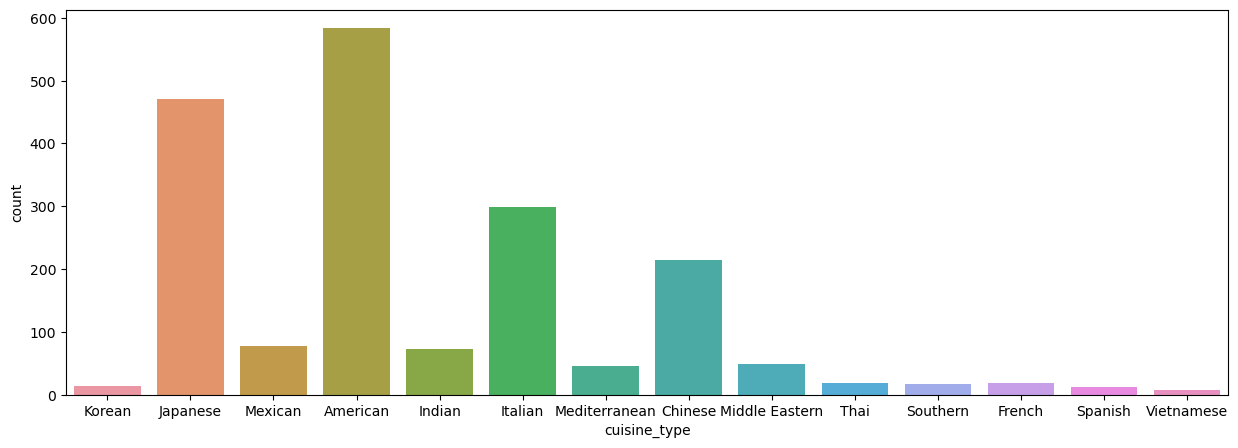

In [32]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'cuisine_type')

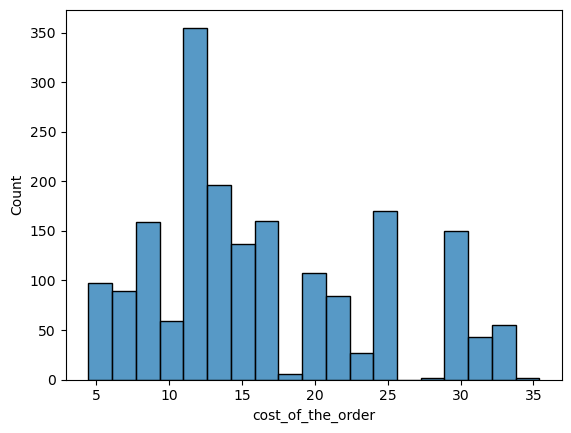

In [33]:
sns.histplot(data=df,x='cost_of_the_order')
plt.show()

<Axes: xlabel='day_of_the_week', ylabel='count'>

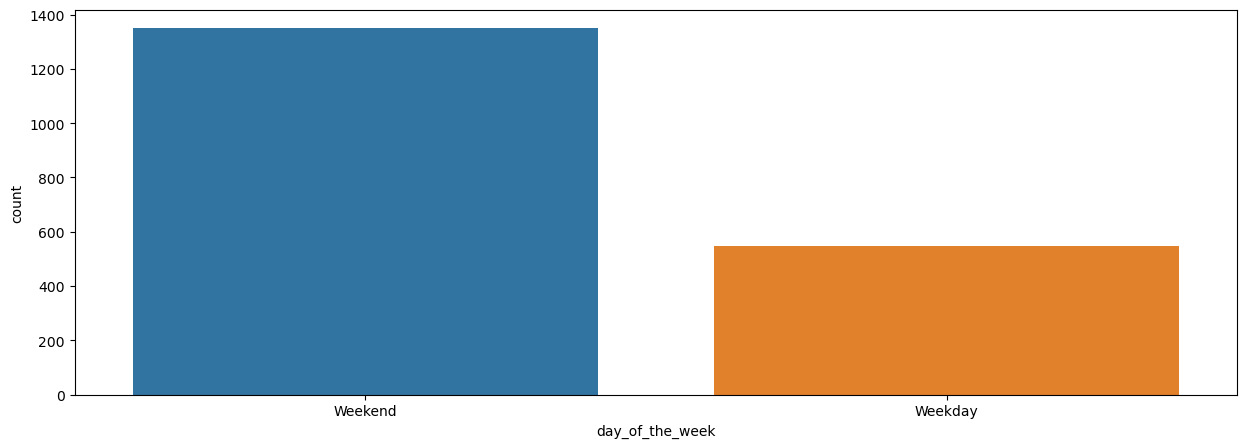

In [39]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'day_of_the_week')

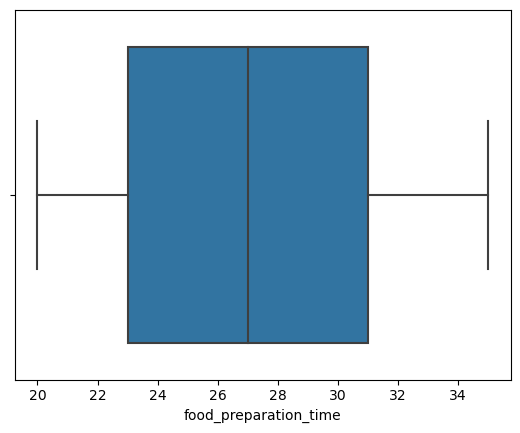

In [40]:
sns.boxplot(data=df,x='food_preparation_time') 
plt.show()

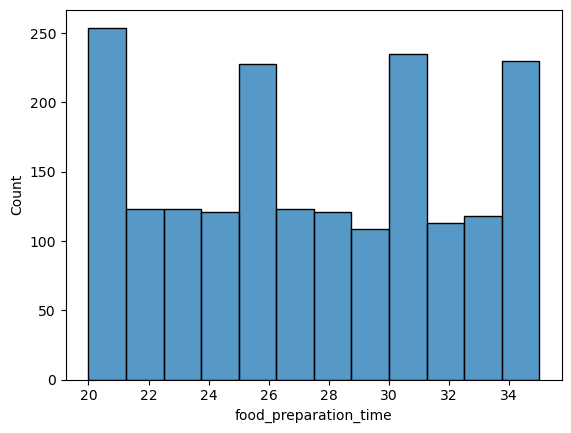

In [41]:
sns.histplot(data=df,x='food_preparation_time') 
plt.show()

<Axes: xlabel='rating', ylabel='count'>

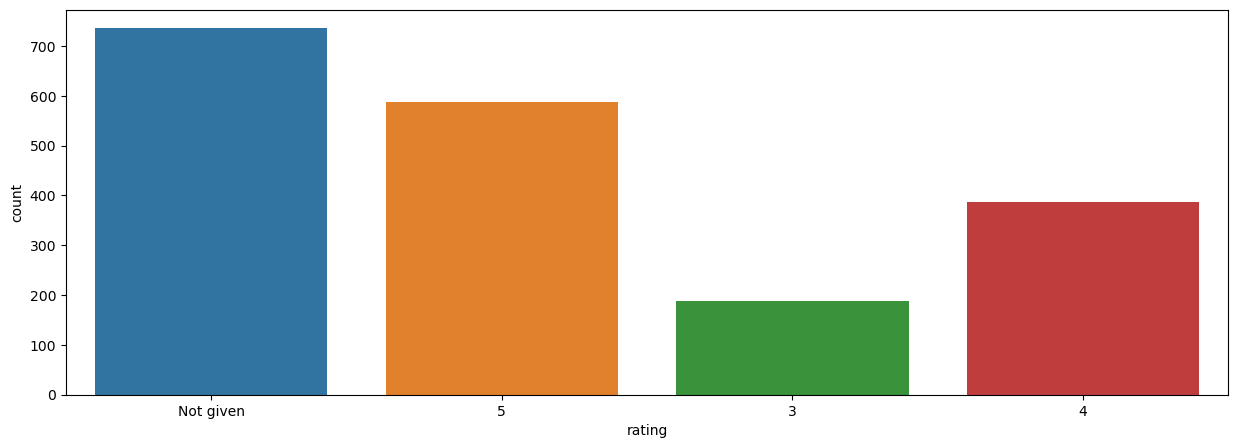

In [42]:
plt.figure(figsize = (15,5))
sns.countplot(data = df, x = 'rating')

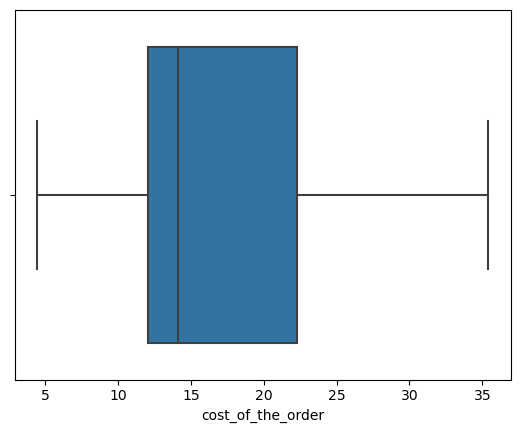

In [44]:
sns.boxplot(data=df,x='cost_of_the_order') 
plt.show()

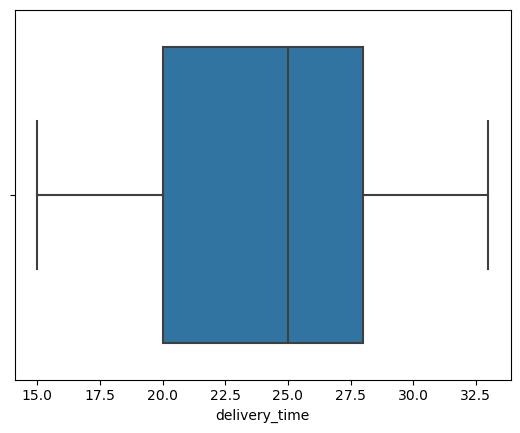

In [50]:
sns.boxplot(data=df,x='delivery_time') 
plt.show()

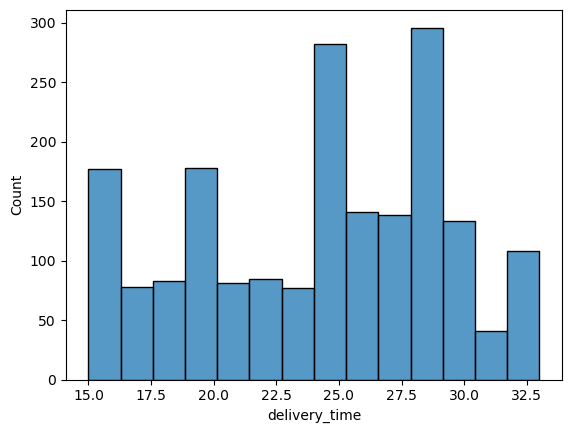

In [51]:
sns.histplot(data=df,x='delivery_time') 
plt.show()

In [63]:
grouped = df.groupby(by='restaurant_name')['order_id'].sum()
grouped.sort_values(ascending=False)

restaurant_name
Shake Shack                      323578315
The Meatball Shop                195029322
Blue Ribbon Sushi                175813497
Blue Ribbon Fried Chicken        141840344
Parm                             100476245
                                   ...    
Le Zie 2000 Trattoria              1476677
Chola Eclectic Indian Cuisine      1476669
Hibino                             1476640
Philippe Chow                      1476622
Emporio                            1476574
Name: order_id, Length: 178, dtype: int64

#### Observations:
Top 5 restaurants in terms of the number of orders received are: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken and Parm.

In [75]:
weekend = df[df['day_of_the_week'] == 'Weekend']
grouped2 = weekend.groupby(by='cuisine_type')['order_id'].sum()
grouped2.sort_values(ascending=False)

cuisine_type
American          613158551
Japanese          494948729
Italian           305855008
Chinese           240835961
Mexican            78306151
Indian             72403714
Middle Eastern     47278695
Mediterranean      47278244
Thai               22165072
French             19206558
Spanish            16252944
Southern           16252369
Korean             16252290
Vietnamese          5908715
Name: order_id, dtype: int64

#### Observations:
The most popular cuisine on weekends is American.

In [80]:
orders = df[df['cost_of_the_order'] > 20]
orders.shape

(555, 9)

In [81]:
df.shape

(1898, 9)

#### Observations:
555/1898 = 0.292 or 29.2% of orders cost more than 20 dollars

In [82]:
df['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is 24.16 minutes.

In [84]:
grouped4 = df.groupby(by='customer_id')['order_id'].sum()
grouped4.sort_values(ascending=False)

customer_id
52832     19206646
47440     14774244
83287     13294706
250494    11822087
82041     10344757
            ...   
214394     1476558
301380     1476556
101347     1476550
75169      1476549
83095      1476547
Name: order_id, Length: 1200, dtype: int64

#### Observations:
The top 3 most frequent customers are: 1) customer 52832 with 19206646 orders. 2) customer 47440 with 14774244 orders. 3) customer 83287 with 13294706 orders.

### Multivariate Analysis

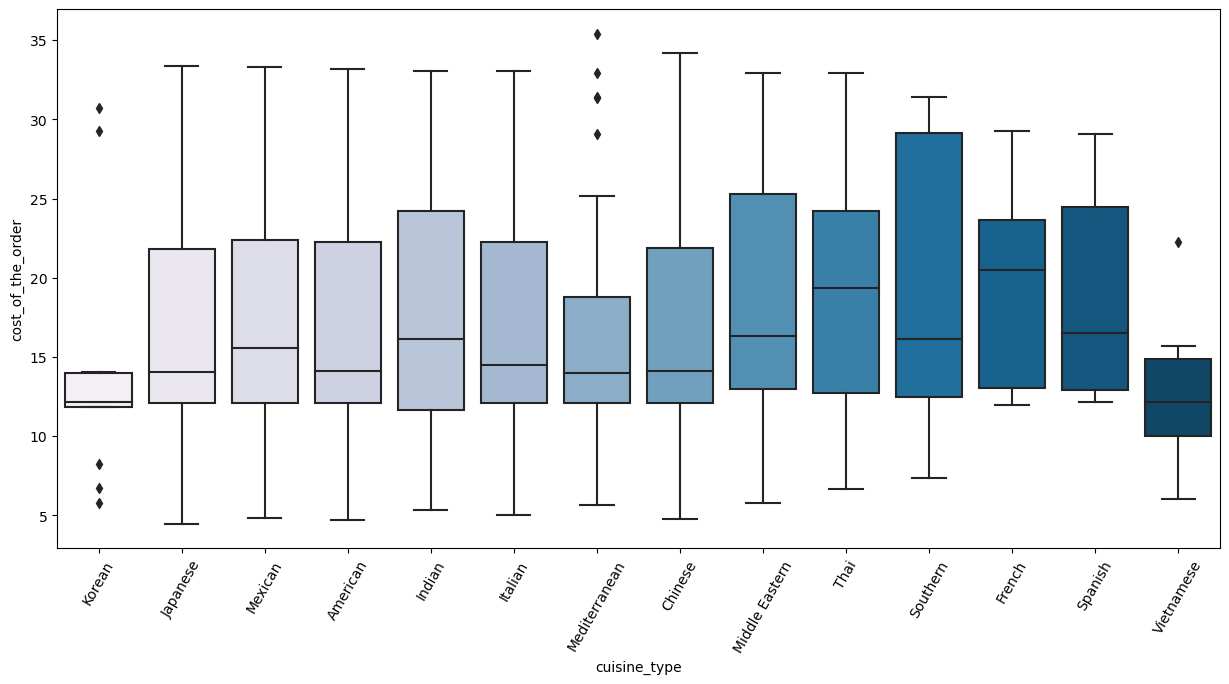

In [85]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

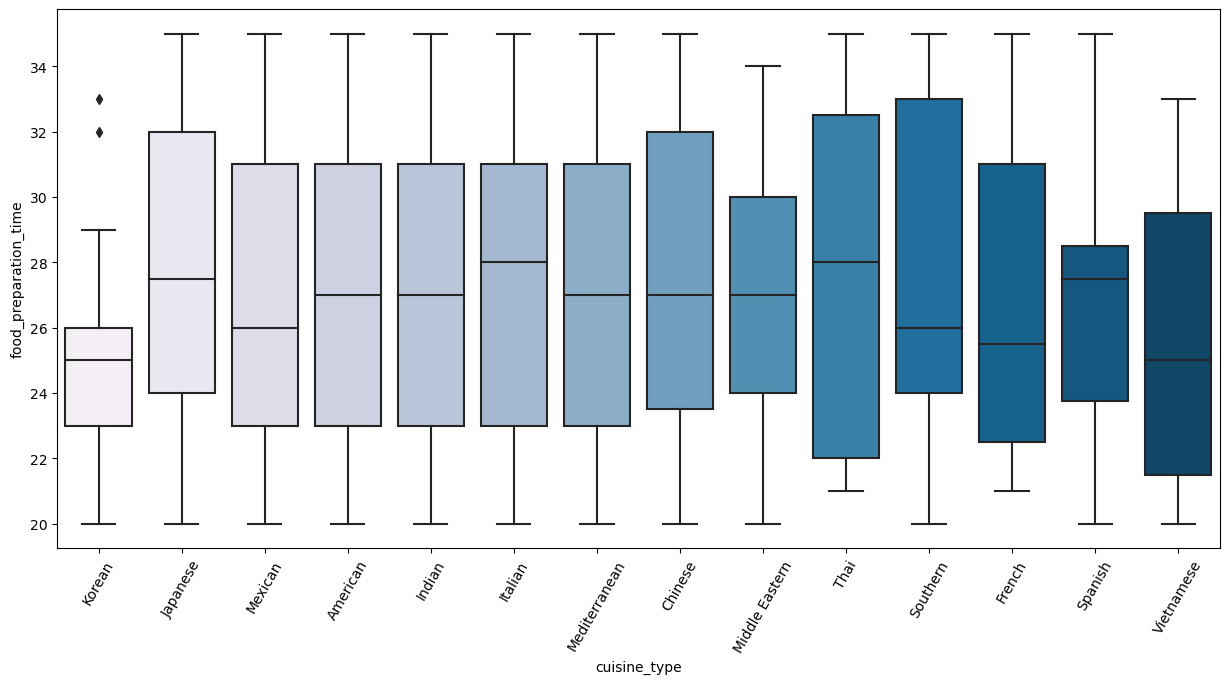

In [86]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "food_preparation_time", data = df, palette = 'PuBu')
plt.xticks(rotation = 60)
plt.show()

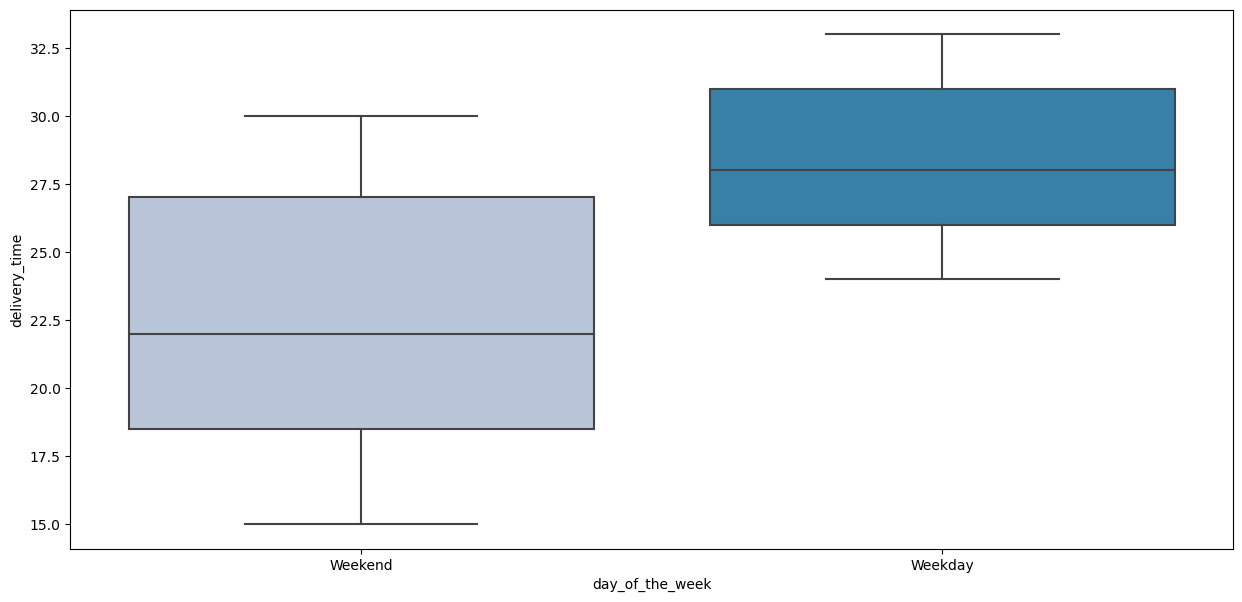

In [87]:
plt.figure(figsize=(15,7))
sns.boxplot(x = "day_of_the_week", y = "delivery_time", data = df, palette = 'PuBu') 
plt.show()

In [91]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(20)

restaurant_name
Shake Shack                              3579.53
The Meatball Shop                        2145.21
Blue Ribbon Sushi                        1903.95
Blue Ribbon Fried Chicken                1662.29
Parm                                     1112.76
RedFarm Broadway                          965.13
RedFarm Hudson                            921.21
TAO                                       834.50
Han Dynasty                               755.29
Blue Ribbon Sushi Bar & Grill             666.62
Rubirosa                                  660.45
Sushi of Gari 46                          640.87
Nobu Next Door                            623.67
Five Guys Burgers and Fries               506.47
Momoya                                    492.13
Chipotle Mexican Grill $1.99 Delivery     491.69
Blue Ribbon Sushi Izakaya                 485.09
Tamarind TriBeCa                          426.71
Jack's Wife Freda                         416.75
Bareburger                                399.74
Name

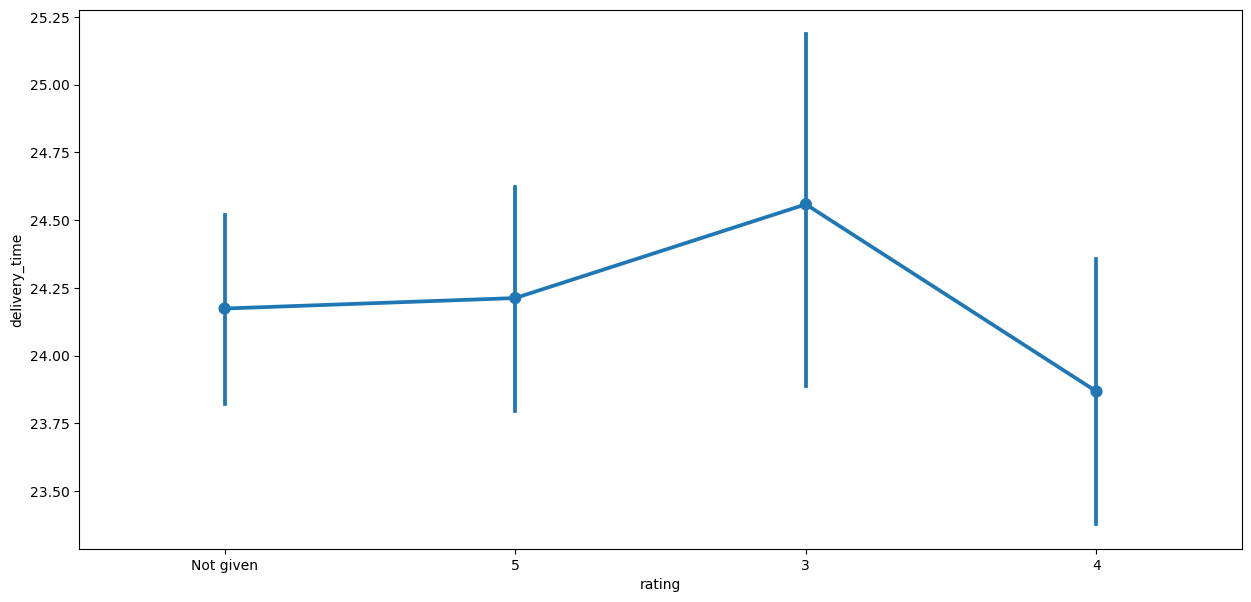

In [92]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

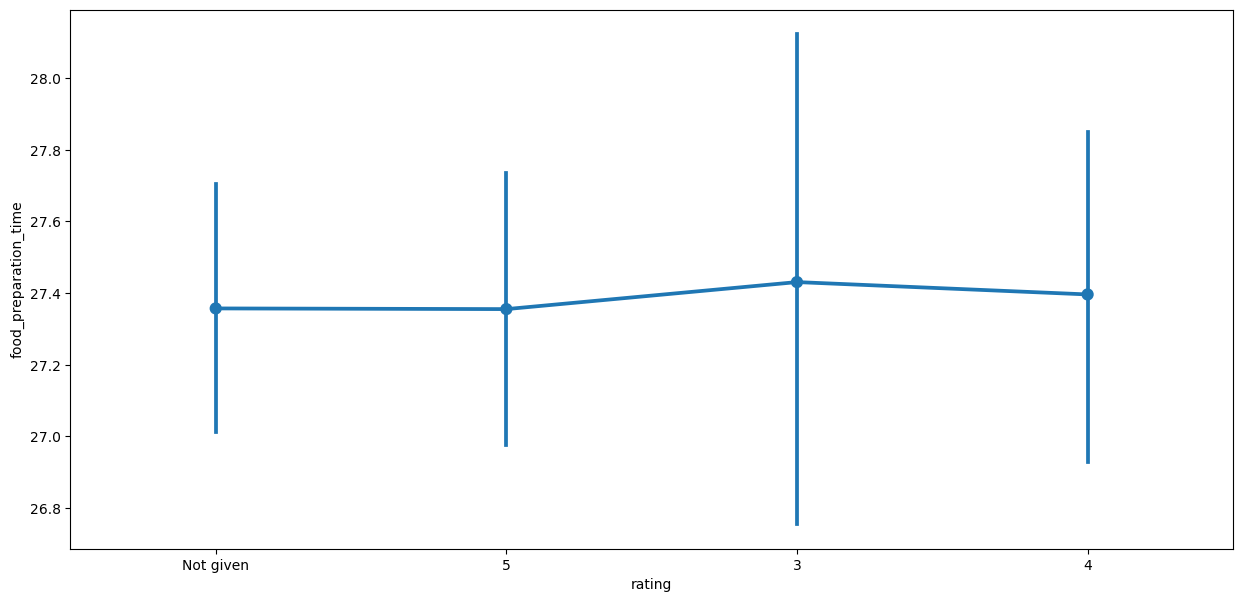

In [94]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'food_preparation_time', data = df)
plt.show()

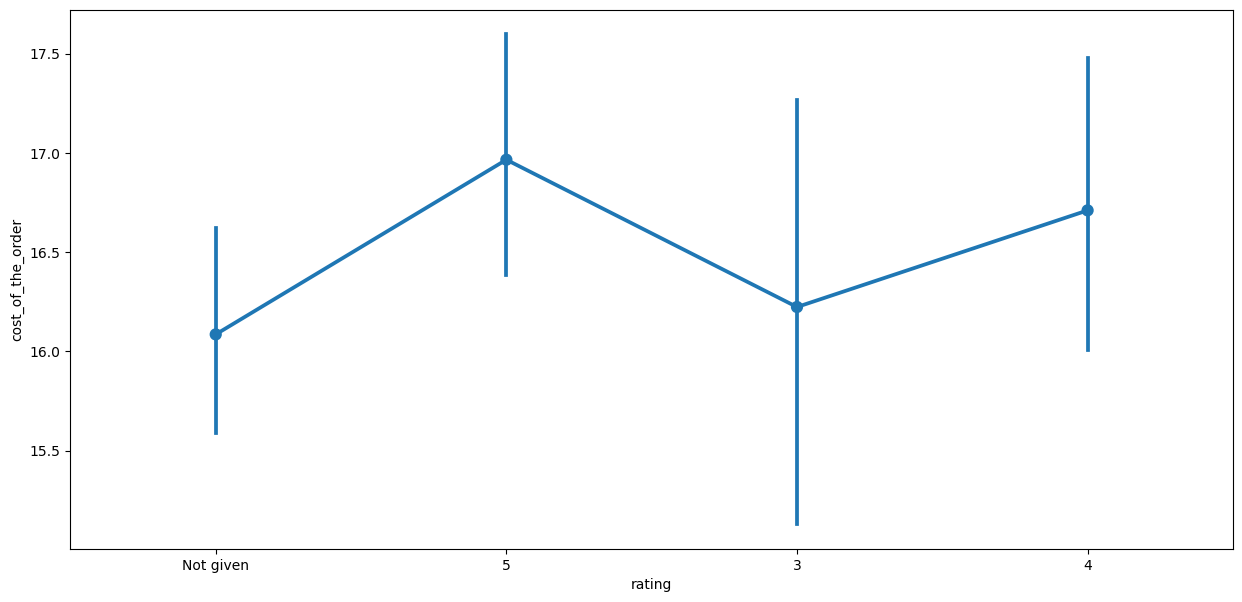

In [95]:
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'cost_of_the_order', data = df)
plt.show()

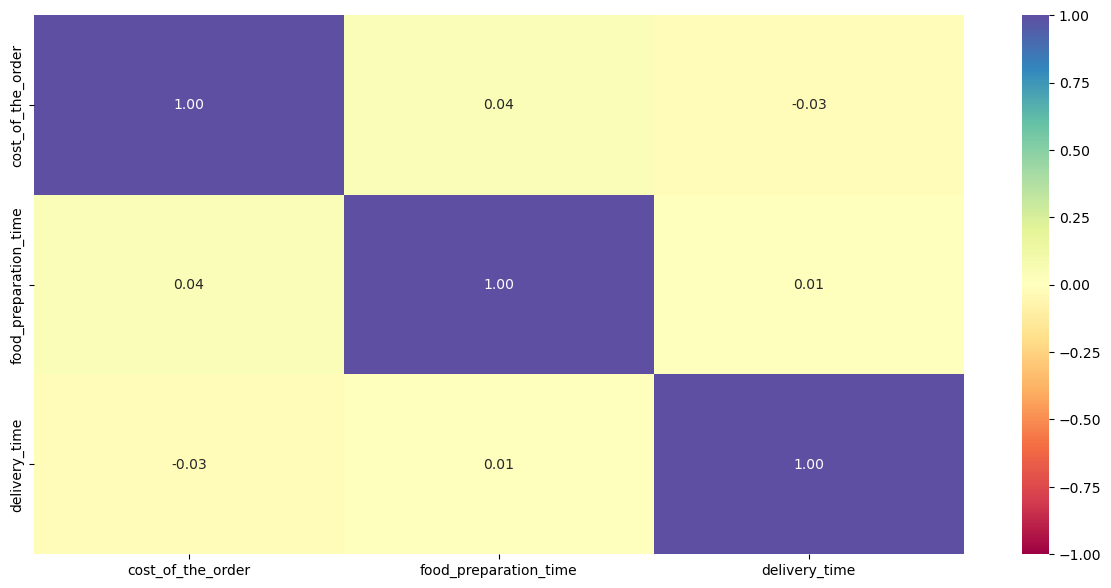

In [99]:
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

In [124]:
df_rated = df[df['rating'] != 'Not given'].copy()

df_rated['rating'] = df_rated['rating'].astype('int')  

df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [125]:
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].sum().sort_values(ascending = False).reset_index()
df_rating_count.head() 

,restaurant_name,rating
0,Shake Shack,569
1,The Meatball Shop,379
2,Blue Ribbon Sushi,308
3,Blue Ribbon Fried Chicken,277
4,RedFarm Broadway,174


In [131]:
print('Shake Shack:',569/133)
print('The Meatball Shop:',379/84)
print('Blue Ribbon Sushi:',308/73)
print('Blue Ribbon Fried Chicken:',277/64)

Shake Shack: 4.2781954887218046
The Meatball Shop: 4.511904761904762
Blue Ribbon Sushi: 4.219178082191781
Blue Ribbon Fried Chicken: 4.328125


#### Observations:
Only 4 restaurants have a count of more than 50 ratings, and average rating that is bigger than 4. 

Shake Shack: 4.2781954887218046 (rating)
The Meatball Shop: 4.511904761904762 (rating)
Blue Ribbon Sushi: 4.219178082191781 (rating)
Blue Ribbon Fried Chicken: 4.328125 (rating)

In [137]:
revenue1 = df['cost_of_the_order'] > 20
total = (df[revenue1]['cost_of_the_order'] * 0.25).sum()
print(total)

3688.7275


In [145]:
revenue2 = (df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] < 20)
total2 = (df[revenue2]['cost_of_the_order'] * 0.15).sum()
print(total2)

2477.5755


In [146]:
print(total + total2)

6166.303


#### Observations:
The net revenue is 6166.303 dollars

In [154]:
delivery = []

delivery = df['delivery_time'] + df['food_preparation_time'] 

68

In [155]:
delivery.shape

(1898,)

In [160]:
delivery[delivery > 60]

7       63
10      62
19      61
24      61
54      64
        ..
1869    61
1873    63
1875    65
1880    62
1889    63
Length: 200, dtype: int64

In [162]:
print(200/1898 * 100, '%')

10.537407797681771 %


#### Observations:
10.53% of all orders take more than 60 minutes to deliver.

In [166]:
delivery_weekdays = []
delivery_weekends = []
delivery_weekdays = df[df['day_of_the_week'] == 'Weekday']
delivery_weekends = df[df['day_of_the_week'] == 'Weekend']

In [167]:
delivery_weekdays['delivery_time'].mean()

28.340036563071298

In [168]:
delivery_weekends['delivery_time'].mean()

22.4700222057735

#### Observations:
The mean during weekdays is 28.3 minutes while during weekends is only 22.47 minutes. So it takes longer on average to deliver during weekdays.

### Conclusion and Recommendations

### Conclusions:
We derived a wealth of insights from the data. Our exploratory analysis successfully distilled complex findings into comprehensible insights for stakeholders unfamiliar with the technical intricacies of the back-end Python code. We discerned numerous correlations and patterns from the analysis, equipping us to offer valuable recommendations to our partners. Notably, our dataset was clean, obviating the need for data transformation or handling of missing values. The insights we've unearthed will undoubtedly enhance the recommendations we present to our stakeholders. A primary challenge that remains is reducing our over-reliance on a select few restaurants for revenue. Diversifying our sources of income is paramount for ensuring business stability and mitigating risks.

# Recommendations:

1) Aim to reduce the average food preparation time during weekdays, as it currently takes an additional 6 minutes compared to other days.

2) Launch more promotions during weekdays to boost its appeal, given that weekends currently draw twice as much traffic.

3) Out of 1,898 orders, only 736 have been rated. Consider redesigning the rating button in our application to encourage more users to leave feedback after their meal delivery.

5) Focus promotional efforts on orders priced between 10-15 USD, as this is the most preferred price range among our clients.

6) Intensify promotions and advertisements for diverse cuisines on our platform. At present, the majority of orders are primarily for American and Japanese dishes.

7) Advocate for other restaurants to enhance their digital presence, noting that a mere 5 restaurants account for the highest number of orders.

8) Contemplate increasing the charge to 20% for orders priced between 5-20 USD, given that this is the most popular price segment.

9) Elevate "Shake Shack" to a privileged partner status within our company, as they contribute to 50% of our total revenue.

10) Based on the data visualization, American and Japanese cuisines dominate due to their attractive price point of 12-20 USD. It's essential to inform other restaurants that they may struggle to compete with these two cuisines if their offerings remain priced above 20 USD.

---